# Digit Recognition using Multi-layer Perceptron (MLP)

In this Jupyter Notebook, I've implemented a digit recognition system using a Multi-layer Perceptron (MLP) neural network. The goal is to accurately classify handwritten digits from the MNIST dataset. I have followed the standard machine learning pipeline, which includes data preprocessing, model training, hyperparameter tuning, evaluation, and result visualization.

## Overview

- **Dataset:** MNIST dataset, consisting of 28x28 pixel grayscale images of handwritten digits (0 to 9).
- **Model:** The MLP model is chosen for its ability to learn complex patterns in image data.
- **Evaluation:** Model's performance has been evaluated using accuracy score, confusion matrix, and visualization of correctly and incorrectly classified images.

## Workflow

1. **Data Loading and Preprocessing:** Load the dataset, preprocess the images (normalize and flatten).
2. **Model Training:** Train an MLP model using the training data.
3. **Hyperparameter Tuning:** Perform hyperparameter tuning to optimize model performance.
4. **Evaluation:** Evaluate the model on validation and test sets, calculate accuracy, and visualize results.
5. **Result Visualization:** Visualize the training loss, confusion matrix, and misclassified images.

This notebook serves as a comprehensive guide to building and evaluating a digit recognition system using MLP. Feel free to collaborate!

# Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Training Images

In this section, we load the training images from the dataset file. The file is in IDX format, and we perform the following steps:

1. Open the file in binary read mode.
2. Read the magic number, number of images, number of rows, and number of columns from the file header.
3. Read the image data and reshape it into a 3D numpy array where each image is represented as a 2D array.

In [12]:
# Load train images
with open('data//train-images.idx3-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_images = int.from_bytes(f.read(4), byteorder='big')
    num_rows = int.from_bytes(f.read(4), byteorder='big')
    num_cols = int.from_bytes(f.read(4), byteorder='big')
    
    train_images = np.frombuffer(f.read(), dtype=np.uint8)
    train_images = train_images.reshape(num_images, num_rows, num_cols)

In [13]:
# Load train labels
with open('data//train-labels.idx1-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_labels = int.from_bytes(f.read(4), byteorder='big')
    
    train_labels = np.frombuffer(f.read(), dtype=np.uint8)

In [14]:
# Load test images
with open('data//t10k-images.idx3-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_images = int.from_bytes(f.read(4), byteorder='big')
    num_rows = int.from_bytes(f.read(4), byteorder='big')
    num_cols = int.from_bytes(f.read(4), byteorder='big')
    
    test_images = np.frombuffer(f.read(), dtype=np.uint8)
    test_images = test_images.reshape(num_images, num_rows, num_cols)

In [15]:
# Load test labels
with open('data//t10k-labels.idx1-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_labels = int.from_bytes(f.read(4), byteorder='big')
    
    test_labels = np.frombuffer(f.read(), dtype=np.uint8)

# Normalize Images

In this section, we normalize the pixel values of the training and test images. Pixel values range from 0 to 255, and we scale them to a range of 0 to 1 by dividing by 255.0. Normalization helps improve the performance and convergence of the neural network.


In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize some sample images

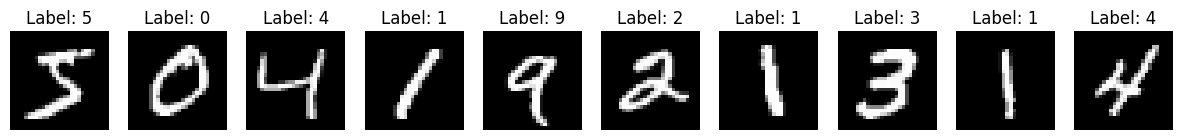

In [17]:
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title('Label: ',train_labels[i])
    axes[i].axis('off')
plt.show()

# Flatten Images

In this section, we flatten the 2D images into 1D arrays. Each image is originally represented as a 2D array of pixel values. We reshape them into 1D arrays to make them suitable for input into the neural network. This is done for both training and test images.


In [18]:
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Hyperparameter Tuning

In this section, we perform hyperparameter tuning for our Multi-layer Perceptron (MLP) model. We define a parameter grid with different configurations of hidden layer sizes, activation functions, and solvers. We iterate through each combination and train an MLP model with these parameters. After training, we evaluate the model's performance on the test set and print the accuracy score for each combination.


In [19]:
hidden_layer_sizes = [(100,),(130,),(160,),(50,50)]
activation = ['relu','tanh']
solver = ['adam','lbfgs']

In [20]:
for i in range(4):
    for j in range(2):
        for k in range(2):
            mlp = MLPClassifier(max_iter=50, random_state=42, learning_rate_init=0.0001, tol=0.005, alpha=0.0001, hidden_layer_sizes=hidden_layer_sizes[i], activation=activation[j], solver=solver[k])
            mlp.fit(train_images,train_labels)
            predicted_labels = mlp.predict(test_images)
            print('hidden layers: ',hidden_layer_sizes[i],', activation: ', activation[j],', solver: ', solver[k],', accuracy score = ', accuracy_score(test_labels, predicted_labels))

hidden layers:  (100,) , activation:  relu , solver:  adam , accuracy score =  0.9626
hidden layers:  (100,) , activation:  relu , solver:  lbfgs , accuracy score =  0.9518
hidden layers:  (100,) , activation:  tanh , solver:  adam , accuracy score =  0.9609
hidden layers:  (100,) , activation:  tanh , solver:  lbfgs , accuracy score =  0.9061
hidden layers:  (130,) , activation:  relu , solver:  adam , accuracy score =  0.9687
hidden layers:  (130,) , activation:  relu , solver:  lbfgs , accuracy score =  0.9627
hidden layers:  (130,) , activation:  tanh , solver:  adam , accuracy score =  0.9633
hidden layers:  (130,) , activation:  tanh , solver:  lbfgs , accuracy score =  0.9007
hidden layers:  (160,) , activation:  relu , solver:  adam , accuracy score =  0.9691


c:\Users\SAM-Tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden layers:  (160,) , activation:  relu , solver:  lbfgs , accuracy score =  0.9592
hidden layers:  (160,) , activation:  tanh , solver:  adam , accuracy score =  0.9662
hidden layers:  (160,) , activation:  tanh , solver:  lbfgs , accuracy score =  0.9182
hidden layers:  (50, 50) , activation:  relu , solver:  adam , accuracy score =  0.9598


c:\Users\SAM-Tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


hidden layers:  (50, 50) , activation:  relu , solver:  lbfgs , accuracy score =  0.9386
hidden layers:  (50, 50) , activation:  tanh , solver:  adam , accuracy score =  0.9631
hidden layers:  (50, 50) , activation:  tanh , solver:  lbfgs , accuracy score =  0.9081


# Train and Evaluate Best MLP Model

After hyperparameter tuning, we select the best model configuration. In this section, we:

1. Define the best MLP model with the chosen hyperparameters.
2. Train the model on the training data.
3. Predict the labels for the test data.
4. Evaluate the model's performance by calculating the accuracy score and printing it.

The chosen parameters for the best MLP model are:
- `hidden_layer_sizes`: (160,)
- `activation`: 'relu'
- `solver`: 'adam'
- `max_iter`: 100
- `learning_rate_init`: 0.0001
- `tol`: 0.0001
- `alpha`: 0.0001


In [36]:
mlp = MLPClassifier(max_iter=100, random_state=42, learning_rate_init=0.0001, tol=0.0001, alpha=0.0001, hidden_layer_sizes=(160,), activation='relu', solver='adam', verbose=True)
mlp.fit(train_images,train_labels)
predicted_labels = mlp.predict(test_images)
print('accuracy score = ', accuracy_score(test_labels, predicted_labels))

Iteration 1, loss = 1.08620232
Iteration 2, loss = 0.44749576
Iteration 3, loss = 0.35028337
Iteration 4, loss = 0.30583834
Iteration 5, loss = 0.27729452
Iteration 6, loss = 0.25547380
Iteration 7, loss = 0.23751060
Iteration 8, loss = 0.22212529
Iteration 9, loss = 0.20838946
Iteration 10, loss = 0.19632903
Iteration 11, loss = 0.18554472
Iteration 12, loss = 0.17566785
Iteration 13, loss = 0.16690218
Iteration 14, loss = 0.15895097
Iteration 15, loss = 0.15148583
Iteration 16, loss = 0.14493342
Iteration 17, loss = 0.13885328
Iteration 18, loss = 0.13297184
Iteration 19, loss = 0.12754622
Iteration 20, loss = 0.12286253
Iteration 21, loss = 0.11810647
Iteration 22, loss = 0.11375649
Iteration 23, loss = 0.10976951
Iteration 24, loss = 0.10566381
Iteration 25, loss = 0.10215826
Iteration 26, loss = 0.09883528
Iteration 27, loss = 0.09555748
Iteration 28, loss = 0.09243285
Iteration 29, loss = 0.08949019
Iteration 30, loss = 0.08673251
Iteration 31, loss = 0.08404136
Iteration 32, los

c:\Users\SAM-Tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# Plot Training Loss

In this section, we visualize the training loss over iterations for the best MLP model. We use `matplotlib` to create a plot that shows how the training loss decreases as the model trains. This helps us understand the model's convergence behavior during training.

- The x-axis represents the number of iterations.
- The y-axis represents the training loss.


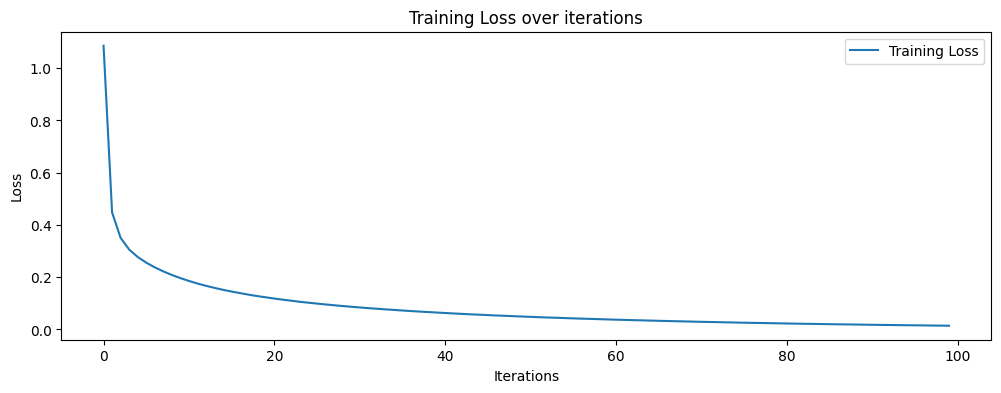

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over iterations')
plt.legend()
plt.show()

# Predict and Evaluate on Train and Test Sets

Validation accuracy: 0.9988
Test accuracy: 0.9801


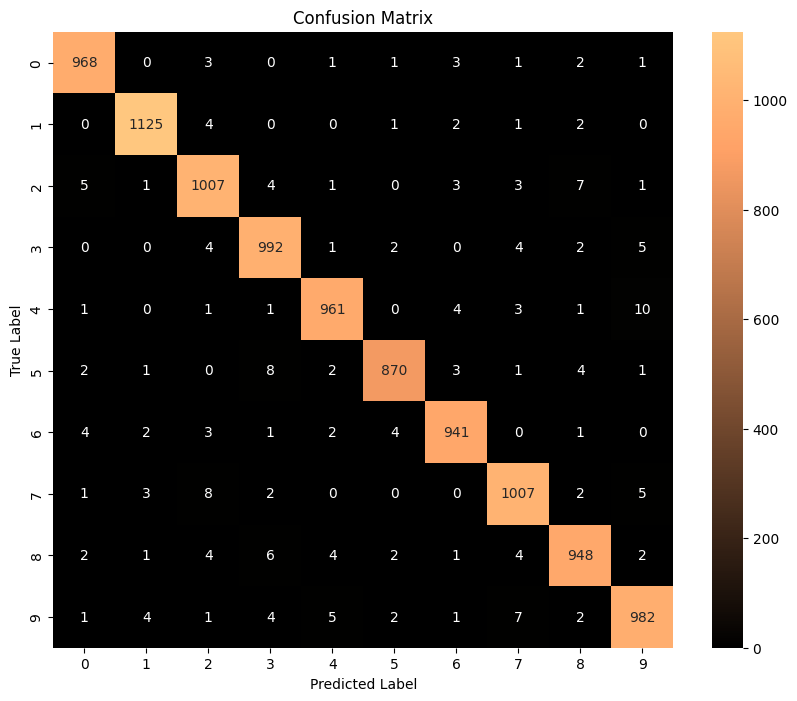

In [38]:
val_predictions = mlp.predict(train_images)
test_predictions = mlp.predict(test_images)

val_accuracy = accuracy_score(train_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print('Train set accuracy: %.2f' % val_accuracy)
print('Test set accuracy: %.2f' % test_accuracy)


# Confusion Matrix

The confusion matrix helps us understand how well the model is performing across different digit classes.

In [ ]:
conf_matrix = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize Misclassified Images

In this section, we identify and visualize some misclassified images from the test set.

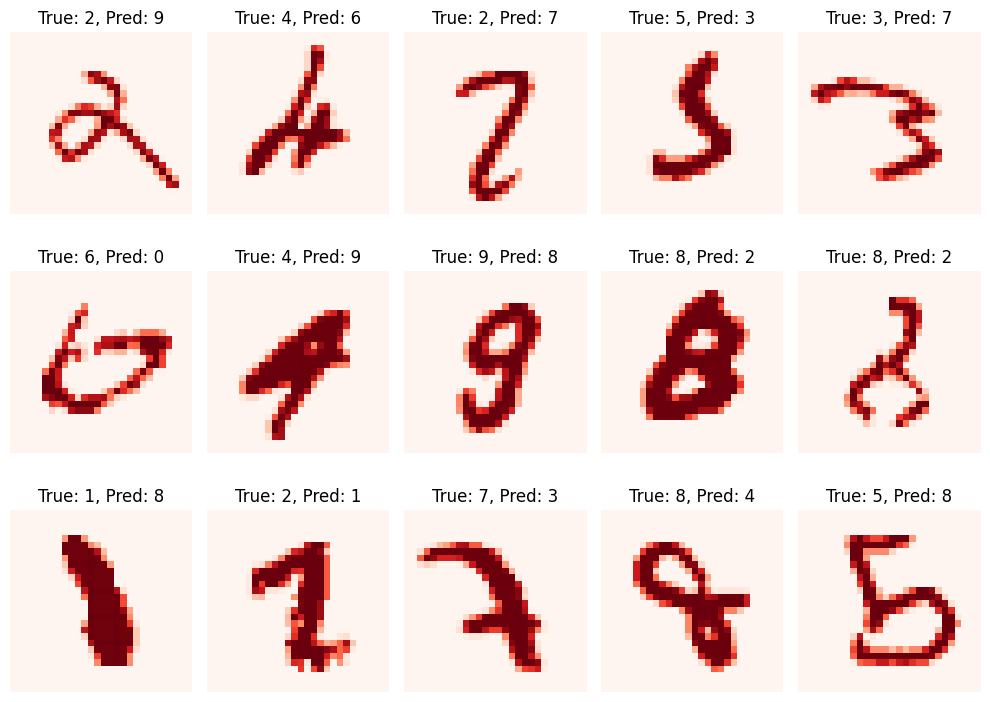

In [39]:
misclassified_indices = np.where(test_predictions != test_labels)[0]
fig, axes = plt.subplots(3, 5, figsize=(10, 7.5))
axes = axes.flatten()
for i in range(15):
    idx = misclassified_indices[i]
    axes[i].imshow(test_images[idx].reshape(28, 28), cmap='Reds')
    axes[i].set_title(f'True: {test_labels[idx]}, Pred: {test_predictions[idx]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Visualize Correctly Classified Images

In this section, we identify and visualize some images which were correctly classified from the test set.

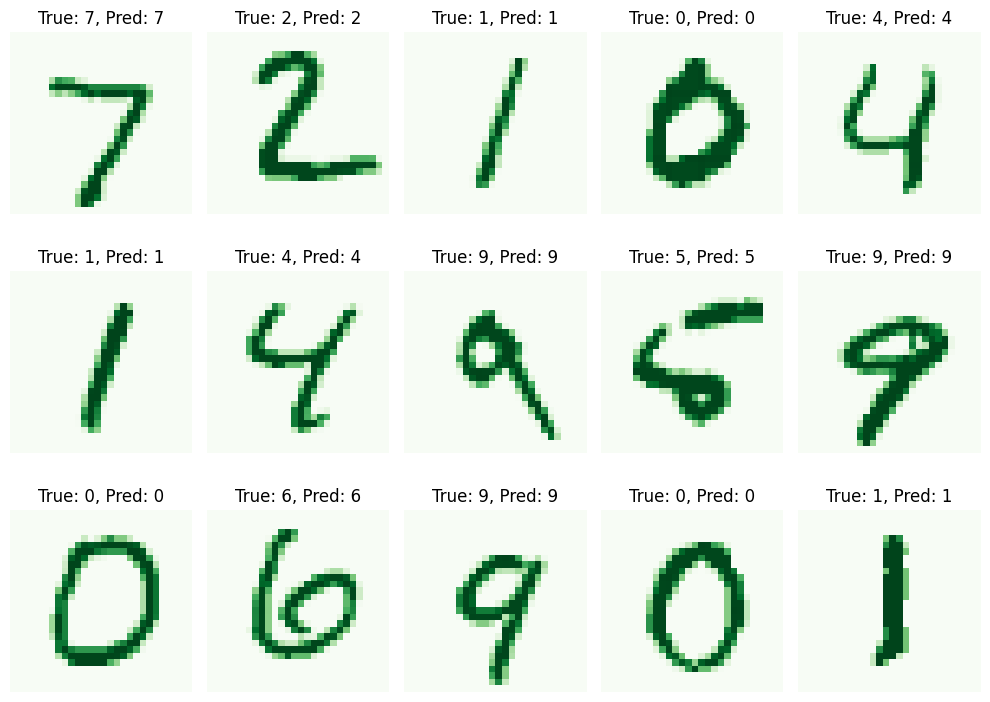

In [40]:
classified_indices = np.where(test_predictions == test_labels)[0]
fig, axes = plt.subplots(3, 5, figsize=(10, 7.5))
axes = axes.flatten()
for i in range(15):
    idx = classified_indices[i]
    axes[i].imshow(test_images[idx].reshape(28, 28), cmap='Greens')
    axes[i].set_title('True: ',test_labels[idx], 'Pred: ', test_predictions[idx])
    axes[i].axis('off')
plt.tight_layout()
plt.show()